# Task D: Come closer, darling!, Eccentric orbits

In [1]:
import numpy as np
from fireworks.ic import ic_two_body
import matplotlib.pyplot as plt
from fireworks.nbodylib.integrators import integrator_euler, integrator_leapfrog, integrator_rungekutta
from fireworks.nbodylib.dynamics import acceleration_direct_vectorized #, acceleration_direct, acceleration_pyfalcon, acceleration_jerk_direct

#from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

We have to choose the initial conditions of our system, namely the two masses, the distance $r$ and the eccentricity $e$. We will consider the three cases $e=0.5$, $e=0.9$ and $e=0.99$ separately. 

In [2]:
mass1 = 1.
mass2 = 2.
rp = 5. 
e_1 = 0.5               
e_2 = 0.9
e_3 = 0.99

part_1 = ic_two_body(mass1, mass2, rp, e_1)
part_2 = ic_two_body(mass1, mass2, rp, e_2)
part_3 = ic_two_body(mass1, mass2, rp, e_3)

### Estimate the period

To estimate the period we use:
$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$
Since we're working in Nbody-units we can get rid of the constant $G$. The semi-major axis $a$ comes from $r_p = a(1-e)$. $M$ is the total mass of the system. We will use this procedure for all three values of $e$.

In [3]:
M_tot_1 = np.sum(part_1.mass)
M_tot_2 = np.sum(part_2.mass)
M_tot_3 = np.sum(part_3.mass)

# e = 0.5 
a_1 = rp / (1 - e_1)
P_1 = np.sqrt((4 * np.pi**2. * a_1**3.)/(M_tot_1))
print('P_1 = ', P_1)

# e = 0.9
a_2 = rp / (1 - e_2)
P_2 = np.sqrt((4 * np.pi**2. * a_2**3.)/(M_tot_2))
print('P_2 = ', P_2)

# e = 0.99 
a_3 = rp / (1 - e_3)
P_3 = np.sqrt((4 * np.pi**2. * a_3**3.)/(M_tot_3))
print('P_3 = ', P_3)

P_1 =  114.71474419090953
P_2 =  1282.5498301618645
P_3 =  40557.78675973606


So, with the initial conditions we gave as imput, we get:

$ P_1 = 114.71$ 

$ P_2 = 1282.55$ 

$ P_3 = 40557.79$ 

### Evolution of the binary system

We have now to evolve the binary systems from $0$ to $10\cdot P$. To do so we use the three different integrators we implemented: the Euler, the Leapfrog and the Runge-Kutta, along with our function `acceleration_direct_vectorized` to estimate the acceleration, exactly as done before.

In [4]:
def integration_euler(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_euler = []
    Ekin_euler = []
    Epot_euler = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_euler(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_euler.append(Etot_n)
            Ekin_euler.append(Ekin_n)
            Epot_euler.append(Epot_n)

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_euler = np.array(Etot_euler)
    Ekin_euler = np.array(Ekin_euler)
    Etot_euler = np.array(Epot_euler)

    return path_1, path_2, Etot_euler, Ekin_euler, Epot_euler

In [5]:
def integration_leapfrog(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_leapfrog = []
    Ekin_leapfrog = []
    Epot_leapfrog = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_leapfrog(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_leapfrog.append(Etot_n)
            Ekin_leapfrog.append(Ekin_n)
            Epot_leapfrog.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_leapfrog = np.array(Etot_leapfrog)
    Ekin_leapfrog = np.array(Ekin_leapfrog)
    Epot_leapfrog = np.array(Epot_leapfrog)

    return path_1, path_2, Etot_leapfrog, Ekin_leapfrog, Epot_leapfrog

In [6]:
def integration_rungekutta(part, h, tsimulation, t, N):
    path_1 = []
    path_2 = []
    Etot_rungekutta = []
    Ekin_rungekutta = []
    Epot_rungekutta = []

    while t < tsimulation:
        for j in range(1,N):
            result = integrator_rungekutta(part, h, acceleration_direct_vectorized)
            updated_part, tstep, updated_acc, _, _ = result
            path_1.append(updated_part.pos[0])
            path_2.append(updated_part.pos[1])
            Etot_n, Ekin_n, Epot_n = updated_part.Etot()
            Etot_rungekutta.append(Etot_n)
            Ekin_rungekutta.append(Ekin_n)
            Epot_rungekutta.append(Epot_n)
        

        t += h

    path_1 = np.array(path_1)
    path_2 = np.array(path_2)
    Etot_rungekutta = np.array(Etot_rungekutta)
    Ekin_rungekutta = np.array(Ekin_rungekutta)
    Epot_rungekutta = np.array(Epot_rungekutta)

    return path_1, path_2, Etot_rungekutta, Ekin_rungekutta, Epot_rungekutta

Initialize the variables.

In [7]:
h_1 = 0.1
h_2 = 1
h_3 = 1

tsimulation_1 = 10*P_1      # end of the simulation for e = 0.5
tsimulation_2 = 10*P_2      # end of the simulation for e = 0.9
tsimulation_3 = 10*P_3      # end of the simulation for e = 0.99

t = 0

N = 2                       # number of particles

### EULER METHOD

In [ ]:
part_1_euler = part_1.copy()
part_2_euler = part_2.copy()
part_3_euler = part_3.copy()

# e = 0.5
path1_euler_1, path2_euler_1, Etot_euler_1, Ekin_euler_1, Epot_euler_1 = integration_euler(part_1_euler, h_1, tsimulation_1, t, N)

# e = 0.9
path1_euler_2, path2_euler_2, Etot_euler_2, Ekin_euler_2, Epot_euler_2 = integration_euler(part_2_euler, h_2, tsimulation_2, t, N)

# e = 0.99
path1_euler_3, path2_euler_3, Etot_euler_3, Ekin_euler_3, Epot_euler_3 = integration_euler(part_3_euler, h_3, tsimulation_3, t, N)

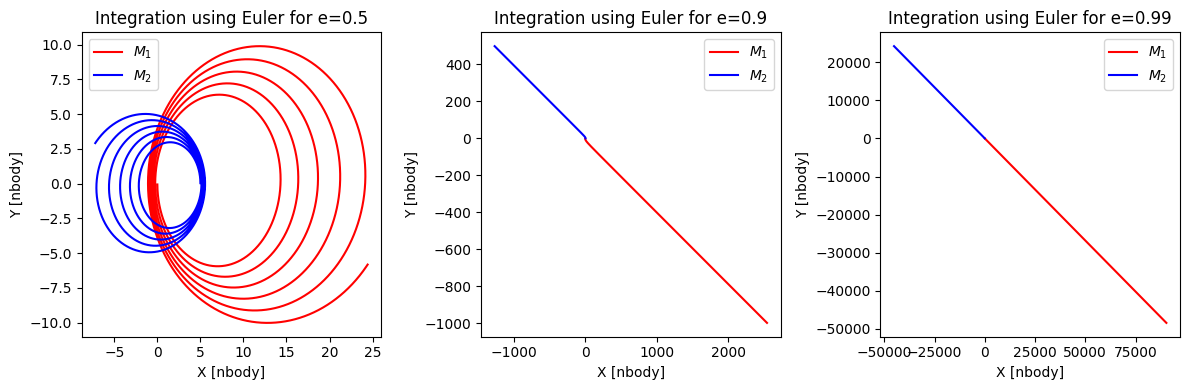

In [18]:
plt.figure(figsize=(12,4))

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('Integration using Euler for e=0.5')
plt.plot(path1_euler_1[:,0], path1_euler_1[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_1[:,0], path2_euler_1[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('Integration using Euler for e=0.9')
plt.plot(path1_euler_2[:,0], path1_euler_2[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_2[:,0], path2_euler_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('Integration using Euler for e=0.99')
plt.plot(path1_euler_3[:,0], path1_euler_3[:,1], label=f'$M_1$', color='red')
plt.plot(path2_euler_3[:,0], path2_euler_3[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()
plt.show()

### LEAPFROG METHOD

In [ ]:
part_1_leapfrog = part_1.copy()
part_2_leapfrog = part_2.copy()
part_3_leapfrog = part_3.copy()

# e = 0.5
path1_leapfrog_1, path2_leapfrog_1, Etot_leapfrog_1, Ekin_leapfrog_1, Epot_leapfrog_1 = integration_leapfrog(part_1_leapfrog, h_1, tsimulation_1, t, N)

# e = 0.9
path1_leapfrog_2, path2_leapfrog_2, Etot_leapfrog_2, Ekin_leapfrog_2, Epot_leapfrog_2 = integration_leapfrog(part_2_leapfrog, h_2, tsimulation_2, t, N)

# e = 0.99
path1_leapfrog_3, path2_leapfrog_3, Etot_leapfrog_3, Ekin_leapfrog_3, Epot_leapfrog_3 = integration_leapfrog(part_3_leapfrog, h_3, tsimulation_3, t, N)

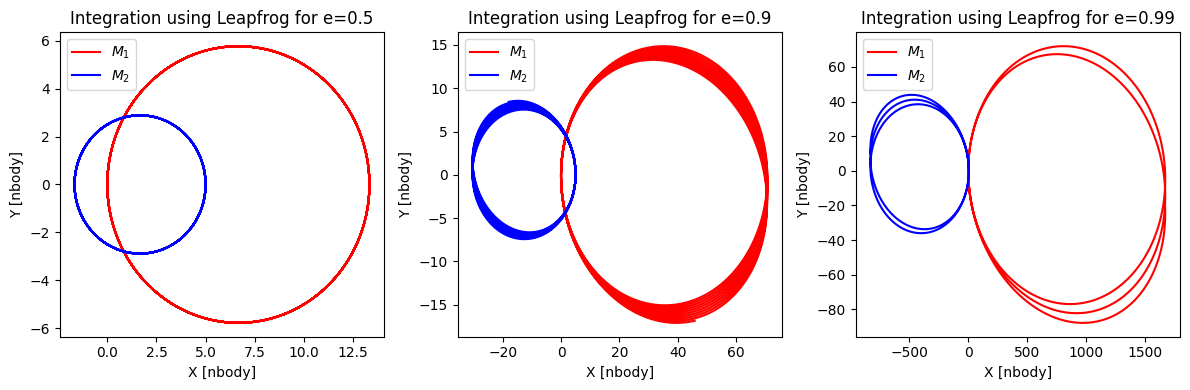

In [17]:
plt.figure(figsize=(12,4))

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('Integration using Leapfrog for e=0.5')
plt.plot(path1_leapfrog_1[:,0], path1_leapfrog_1[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_1[:,0], path2_leapfrog_1[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('Integration using Leapfrog for e=0.9')
plt.plot(path1_leapfrog_2[:,0], path1_leapfrog_2[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_2[:,0], path2_leapfrog_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('Integration using Leapfrog for e=0.99')
plt.plot(path1_leapfrog_3[:,0], path1_leapfrog_3[:,1], label=f'$M_1$', color='red')
plt.plot(path2_leapfrog_3[:,0], path2_leapfrog_3[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()
plt.show()

### RUNGE- KUTTA METHOD

In [ ]:
part_1_rungekutta = part_1.copy()
part_2_rungekutta = part_2.copy()
part_3_rungekutta = part_3.copy()

# e = 0.5
path1_rungekutta_1, path2_rungekutta_1, Etot_rungekutta_1, Ekin_rungekutta_1, Epot_rungekutta_1 = integration_rungekutta(part_1_rungekutta, h_1, tsimulation_1, t, N)

# e = 0.9
path1_rungekutta_2, path2_rungekutta_2, Etot_rungekutta_2, Ekin_rungekutta_2, Epot_rungekutta_2 = integration_rungekutta(part_2_rungekutta, h_2, tsimulation_2, t, N)

# e = 0.99
path1_rungekutta_3, path2_rungekutta_3, Etot_rungekutta_3, Ekin_rungekutta_3, Epot_rungekutta_3 = integration_rungekutta(part_3_rungekutta, h_3, tsimulation_3, t, N)

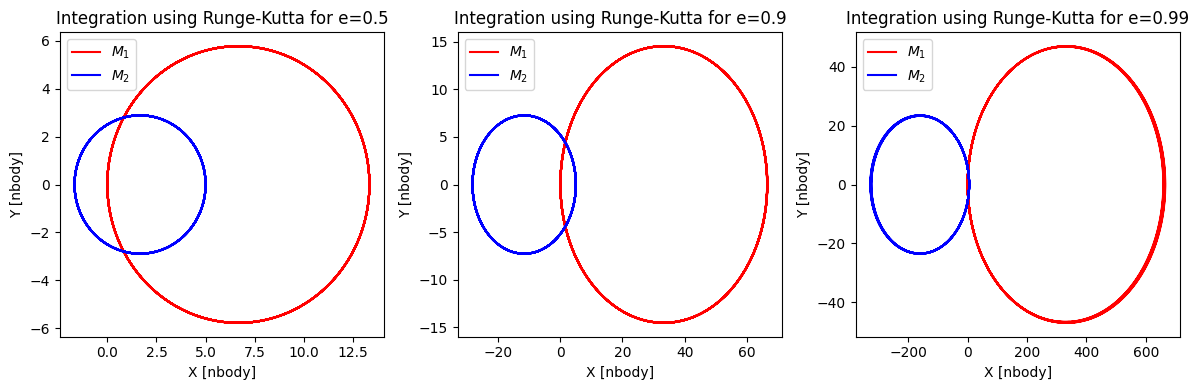

In [16]:
plt.figure(figsize=(12,4))

#PLOT e = 0.5
plt.subplot(1,3,1)
plt.title('Integration using Runge-Kutta for e=0.5')
plt.plot(path1_rungekutta_1[:,0], path1_rungekutta_1[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_1[:,0], path2_rungekutta_1[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.9
plt.subplot(1,3,2)
plt.title('Integration using Runge-Kutta for e=0.9')
plt.plot(path1_rungekutta_2[:,0], path1_rungekutta_2[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_2[:,0], path2_rungekutta_2[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

#PLOT e = 0.99
plt.subplot(1,3,3)
plt.title('Integration using Runge-Kutta for e=0.99')
plt.plot(path1_rungekutta_3[:,0], path1_rungekutta_3[:,1], label=f'$M_1$', color='red')
plt.plot(path2_rungekutta_3[:,0], path2_rungekutta_3[:,1], label=f'$M_2$', color='blue')
plt.xlabel('X [nbody]')
plt.ylabel('Y [nbody]')
plt.legend()

plt.tight_layout()
plt.show()